In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from math import floor
from matplotlib import pyplot as plt

In [2]:
#getting the data

msft=yf.Ticker('MSFT').history(start='2017-01-01')
msft=msft['Close'].to_frame()
msft['SMA50']=msft['Close'].rolling(50).mean()
msft['SMA200']=msft['Close'].rolling(200).mean()
msft['SMA200_std']=msft['Close'].rolling(200).std()
msft.dropna(subset=['SMA200'], inplace=True)

brent=yf.Ticker('BZ=F').history(start='2017-01-01')
brent=brent['Close'].to_frame()
brent['SMA50']=brent['Close'].rolling(50).mean()
brent['SMA200']=brent['Close'].rolling(200).mean()
brent['SMA200_std']=brent['Close'].rolling(200).std()
brent.dropna(subset=['SMA200'], inplace=True)

unh=yf.Ticker('UNH').history(start='2017-01-01')
unh=unh['Close'].to_frame()
unh['SMA50']=unh['Close'].rolling(50).mean()
unh['SMA200']=unh['Close'].rolling(200).mean()
unh['SMA200_std']=unh['Close'].rolling(200).std()
unh.dropna(subset=['SMA200'], inplace=True)

My ROI: 255.33937446594237%, long position ROI: 297.6370633299178%
Money made: 25533.93744659424


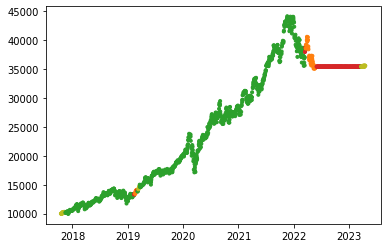

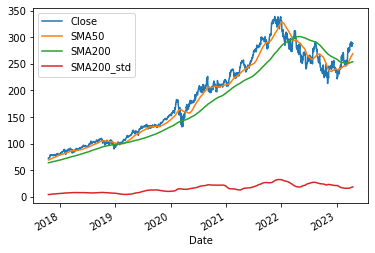

In [3]:
k=5
funds=10000
quantity=0
history=[]
colour=[]

#signal: buy if SMA50>SMA200, otherwise sell

for day in msft.index:
    if msft.loc[day]['SMA50']>msft.loc[day]['SMA200']:
        q=round((msft.loc[day]['SMA50']-msft.loc[day]['SMA200'])/msft.loc[day]['SMA200_std']*k) #proposed buy quantity
        
        if funds<q*msft.loc[day]['Close']:            #check if there are not enough funds, if yes adjust q
            q=floor(funds/msft.loc[day]['Close'])
            
        funds-=q*msft.loc[day]['Close']
        quantity+=q
        history.append(funds+quantity*msft.loc[day]['Close'])
        colour.append('tab:olive' if q>0 else 'tab:green')
    else:
        q=round((msft.loc[day]['SMA200']-msft.loc[day]['SMA50'])/msft.loc[day]['SMA200_std']*k) #proposed sell quantity
        
        if quantity<q:
            q=quantity
        
        funds+=q*msft.loc[day]['Close']
        quantity-=q
        history.append(funds+quantity*msft.loc[day]['Close'])
        colour.append('tab:orange' if q>0 else 'tab:red')
        
plt.scatter(x=msft.index, y=history, c=colour, marker='.')
msft.plot()

#calculate ROI

print("My ROI: {}%, long position ROI: {}%".format((history[-1]-10000)/100, (msft.iloc[-1, 0]/msft.iloc[0, 0]-1)*100))
print("Money made: {}".format(history[-1]-10000))

My ROI: 67.83649982452393%, long position ROI: 45.434217499009755%
Money made: 6783.649982452393


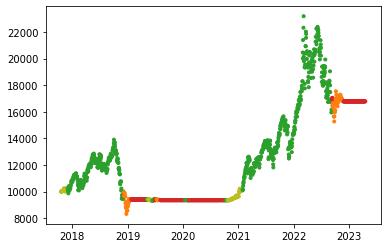

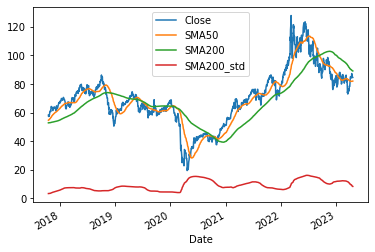

In [4]:
k=5
funds=10000
quantity=0
history=[]
colour=[]

#signal: buy if SMA50>SMA200, otherwise sell

for day in brent.index:
    if brent.loc[day]['SMA50']>brent.loc[day]['SMA200']:
        q=round((brent.loc[day]['SMA50']-brent.loc[day]['SMA200'])/brent.loc[day]['SMA200_std']*k) #proposed buy quantity
        
        if funds<q*brent.loc[day]['Close']:            #check if there are not enough funds, if yes adjust q
            q=floor(funds/brent.loc[day]['Close'])
            
        funds-=q*brent.loc[day]['Close']
        quantity+=q
        history.append(funds+quantity*brent.loc[day]['Close'])
        colour.append('tab:olive' if q>0 else 'tab:green')
    else:
        q=round((brent.loc[day]['SMA200']-brent.loc[day]['SMA50'])/brent.loc[day]['SMA200_std']*k) #proposed sell quantity
        
        if quantity<q:
            q=quantity
        
        funds+=q*brent.loc[day]['Close']
        quantity-=q
        history.append(funds+quantity*brent.loc[day]['Close'])
        colour.append('tab:orange' if q>0 else 'tab:red')
        
plt.scatter(x=brent.index, y=history, c=colour, marker='.')
brent.plot()

#calculate ROI

print("My ROI: {}%, long position ROI: {}%".format((history[-1]-10000)/100, (brent.iloc[-1, 0]/brent.iloc[0, 0]-1)*100))
print("Money made: {}".format(history[-1]-10000))

My ROI: 106.91186935424804%, long position ROI: 168.0625513842741%
Money made: 10691.186935424805


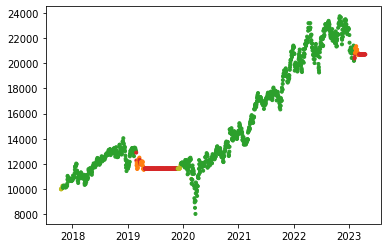

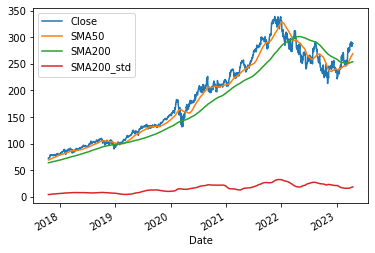

In [5]:
k=5
funds=10000
quantity=0
history=[]
colour=[]

#signal: buy if SMA50>SMA200, otherwise sell

for day in unh.index:
    if unh.loc[day]['SMA50']>unh.loc[day]['SMA200']:
        q=round((unh.loc[day]['SMA50']-unh.loc[day]['SMA200'])/unh.loc[day]['SMA200_std']*k) #proposed buy quantity
        
        if funds<q*unh.loc[day]['Close']:            #check if there are not enough funds, if yes adjust q
            q=floor(funds/unh.loc[day]['Close'])
            
        funds-=q*unh.loc[day]['Close']
        quantity+=q
        history.append(funds+quantity*unh.loc[day]['Close'])
        colour.append('tab:olive' if q>0 else 'tab:green')
    else:
        q=round((unh.loc[day]['SMA200']-unh.loc[day]['SMA50'])/unh.loc[day]['SMA200_std']*k) #proposed sell quantity
        
        if quantity<q:
            q=quantity
        
        funds+=q*unh.loc[day]['Close']
        quantity-=q
        history.append(funds+quantity*unh.loc[day]['Close'])
        colour.append('tab:orange' if q>0 else 'tab:red')
        
plt.scatter(x=msft.index, y=history, c=colour, marker='.')
msft.plot()

#calculate ROI

print("My ROI: {}%, long position ROI: {}%".format((history[-1]-10000)/100, (unh.iloc[-1, 0]/unh.iloc[0, 0]-1)*100))
print("Money made: {}".format(history[-1]-10000))